In [1]:
import pandas as pd
import nltk
import spacy
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

/var/folders/4l/ns658b_x7jq0xzx004lrrl_w0000gn/T/ipykernel_3513/2272408707.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


                                         Textos_espanol  sdg
1935  Hicimos hincapié en que tales ejemplos debían ...    4
2900  A continuación, discutimos brevemente algunas ...    5
3163  El Banco de Desarrollo de Bahréin27 está espec...    5
2742  Las variables independientes son el sexo, la p...    5
1794  No hay espacio para considerar todas estas múl...    4
1697  En las reuniones con el equipo de revisión, lo...    4
89    Estos requisitos fueron tomados de la Decisión...    3
903   De acuerdo con el aviso de alerta temprana de ...    3
3529  Los enfoques de la presupuestación participati...    5
1162  Este capítulo esboza el impacto del cambio de ...    4


<Axes: xlabel='sdg'>

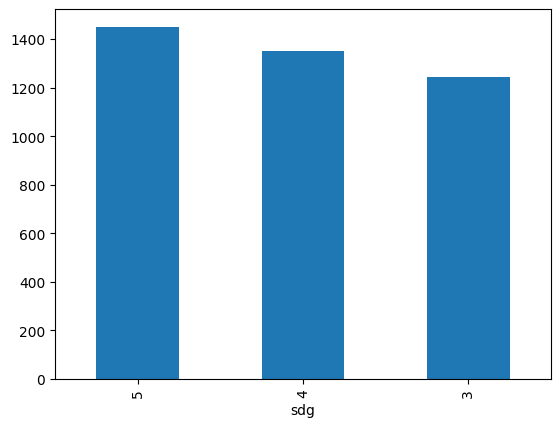

In [11]:
# Cargar los datos
df = pd.read_excel('data.xlsx')

# Mostrar una muestra de los datos
sample = df.sample(10)
print(sample)

#Explorar que las etiquetas sean congruentes con la información del negocio
df['sdg'].value_counts().plot(kind='bar')

In [12]:
# Definir características y etiquetas
X = df['Textos_espanol']
y = df['sdg']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))

3239 810


In [5]:
nltk.download('stopwords')

# Cargar el modelo lemmatizador en español
nlp = spacy.load('es_core_news_sm')

# Obtener stopwords en español
spanish_stopwords = set(stopwords.words('spanish'))  # Convertir a set para mayor eficiencia en la búsqueda

# Definir un tokenizador que lematiza y elimina stopwords
def lemmatize_and_remove_stopwords(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc if token.is_alpha]  # Lemmatize and keep only alphabetic tokens
    tokens_without_stopwords = [token for token in lemmatized_tokens if token not in spanish_stopwords]  # Remove stopwords
    return ' '.join(tokens_without_stopwords)  # Return as a single string


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sebastiangaona/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Definir los pipelines de cada algoritmo para clasificación de texto
pipeMNB = Pipeline([
    ('tfi', TfidfVectorizer(tokenizer=lemmatize_and_remove_stopwords, ngram_range=(1, 3))),
    ('clf', MultinomialNB()),
])

pipeCNB = Pipeline([
    ('tfi', TfidfVectorizer(tokenizer=lemmatize_and_remove_stopwords, ngram_range=(1, 3))),
    ('clf', ComplementNB()),
])

pipeSVC = Pipeline([
    ('tfi', TfidfVectorizer(tokenizer=lemmatize_and_remove_stopwords, ngram_range=(1, 3))),
    ('clf', LinearSVC()),
])

pipeRF = Pipeline([
    ('tfi', TfidfVectorizer(tokenizer=lemmatize_and_remove_stopwords, ngram_range=(1, 3))),
    ('clf', RandomForestClassifier(n_estimators=100)),  
])

pipeGB = Pipeline([
    ('tfi', TfidfVectorizer(tokenizer=lemmatize_and_remove_stopwords, ngram_range=(1, 3))),
    ('clf', GradientBoostingClassifier(n_estimators=100)),  
])

pipeLR = Pipeline([
    ('tfi', TfidfVectorizer(tokenizer=lemmatize_and_remove_stopwords, ngram_range=(1, 3))),
    ('clf', LogisticRegression(max_iter=1000)),  
])

In [7]:
# Entrenar los modelos con el conjunto de entrenamiento
pipeMNB.fit(X_train, y_train)
pipeCNB.fit(X_train, y_train)
pipeSVC.fit(X_train, y_train)
pipeRF.fit(X_train, y_train)
pipeGB.fit(X_train, y_train)
pipeLR.fit(X_train, y_train)

# Predecir y evaluar los modelos con el conjunto de prueba
predictMNB = pipeMNB.predict(X_test)
predictCNB = pipeCNB.predict(X_test)
predictSVC = pipeSVC.predict(X_test)
predictRF = pipeRF.predict(X_test)
predictGB = pipeGB.predict(X_test)
predictLR = pipeLR.predict(X_test)

In [9]:
print("MNB")
print(classification_report(y_test, predictMNB))

print("CNB")
print(classification_report(y_test, predictCNB))

print("SVC")
print(classification_report(y_test, predictSVC))

print("RF")
print(classification_report(y_test, predictRF))

print("GB")
print(classification_report(y_test, predictGB))

print("LR")
print(classification_report(y_test, predictLR))

MNB
              precision    recall  f1-score   support

           3       1.00      0.94      0.97       250
           4       0.97      0.97      0.97       268
           5       0.93      0.98      0.96       292

    accuracy                           0.97       810
   macro avg       0.97      0.96      0.97       810
weighted avg       0.97      0.97      0.97       810

CNB
              precision    recall  f1-score   support

           3       1.00      0.97      0.98       250
           4       0.97      0.97      0.97       268
           5       0.96      0.98      0.97       292

    accuracy                           0.98       810
   macro avg       0.98      0.97      0.98       810
weighted avg       0.98      0.98      0.98       810

SVC
              precision    recall  f1-score   support

           3       0.98      0.98      0.98       250
           4       0.97      0.98      0.97       268
           5       0.98      0.98      0.98       292

    accu

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Función para plotear la matriz de confusión
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Obtener y mostrar las matrices de confusión
cmMNB = confusion_matrix(y_test, predictMNB)
print("MNB Confusion Matrix")
plot_confusion_matrix(cmMNB, classes=y.unique())

cmCNB = confusion_matrix(y_test, predictCNB)
print("CNB Confusion Matrix")
plot_confusion_matrix(cmCNB, classes=y.unique())

cmSVC = confusion_matrix(y_test, predictSVC)
print("SVC Confusion Matrix")
plot_confusion_matrix(cmSVC, classes=y.unique())

cmRF = confusion_matrix(y_test, predictRF)
print("RF Confusion Matrix")
plot_confusion_matrix(cmRF, classes=y.unique())

cmGB = confusion_matrix(y_test, predictGB)
print("GB Confusion Matrix")
plot_confusion_matrix(cmGB, classes=y.unique())

cmLR = confusion_matrix(y_test, predictLR)
print("LR Confusion Matrix")
plot_confusion_matrix(cmLR, classes=y.unique())